# Projeto Alura Voz

# Semana II

Nessa segunda semana o objetivo é analisar a variável Churn que é referente as pessoas que deixaram de utilizar os serviços da empresa, irei visualizar a distribuição do Churn e criar visualizações relevantes analisando a correlação das variáves e utilizarei diferentes tipos de gráficos para isso.

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [189]:
df = pd.read_csv("ArquivoChurn.csv")
df.head()

,Unnamed: 0,ID,Churn,Sexo,Senior,Casado,Dependentes,Meses_Contrato,Telefone,Multiplas_Linhas,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Digital,Gasto_Diario,Forma_Pagamento,Encargo_Mensal,Encargo_Total
0,0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,...,No,Yes,Yes,No,One year,Yes,2.19,Mailed check,65.6,593.3
1,1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,...,No,No,No,Yes,Month-to-month,No,2.00,Mailed check,59.9,542.4
2,2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,...,Yes,No,No,No,Month-to-month,Yes,2.46,Electronic check,73.9,280.85
3,3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,3.27,Electronic check,98.0,1237.85
4,4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,...,No,Yes,Yes,No,Month-to-month,Yes,2.80,Mailed check,83.9,267.4


## Análises gráfica do Churn

Nessa primeira análise irei verificar e demonstrar a porcentagem de clientes que cancelaram os serviços da empresa Alura Voz.

No     73.46
Yes    26.54
Name: Churn, dtype: float64


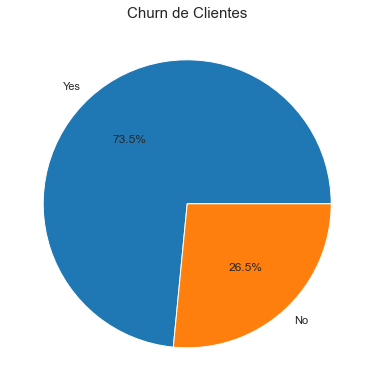

In [204]:
Porcentagem_Churn = round(df.Churn.value_counts(normalize=True)*100,2)
print(Porcentagem_Churn)

sns.set_theme(style="whitegrid", palette = "tab10")
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
labels = ['Yes', 'No']

ax.pie(df.Churn.value_counts(normalize = True)*100, labels = labels, autopct = '%0.1f%%')
ax.set_title('Churn de Clientes', fontsize = 15)

plt.show()

Nesse primeiro momento podemos perceber que 26.54% dos clientes deixaram a empresa e isso é um número alto iremos buscar informações para entender o perfil das pessoas que deixaram de utilizar os serviços da empresa

## Relação do Churn com o sexo dos clientes

Iremos realizar uma análise referente ao sexo dos clientes para entender se tem alguma relação com o Churn

In [191]:
Sexo_Quantidade = df.Sexo.value_counts()
display(Sexo_Quantidade)

Male      3555
Female    3488
Name: Sexo, dtype: int64

In [192]:
Churn_yes = df.query("Churn == 'Yes'")

In [193]:
Sexo_Churn = pd.crosstab(df.Churn, df.Sexo).reset_index()
Sexo_Churn.Female = round((Sexo_Churn.Female / Sexo_Churn.Female.sum()) * 100, 2)
Sexo_Churn.Male = round((Sexo_Churn.Male / Sexo_Churn.Male.sum()) * 100, 2)
display(Sexo_Churn)

Sexo,Churn,Female,Male
0,No,73.08,73.84
1,Yes,26.92,26.16


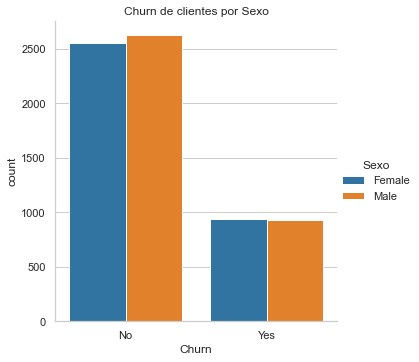

In [203]:
sns.set_theme(style="whitegrid", palette = "tab10")
plot = sns.catplot(data=df, kind='count', x='Churn', hue='Sexo');
plt.title('Churn de clientes por Sexo');
plt.show()

Após essas análise podemos observar que o sexo dos clientes não é relevante para o fator Churn, ja que a quantidade de homens e mulheres que deixaram de utilizar o serviço da empresa é basicamente a mesma

## Relação do Churn com a idade dos clientes

Irei realizar uma análise envolvendo a idade dos clientes

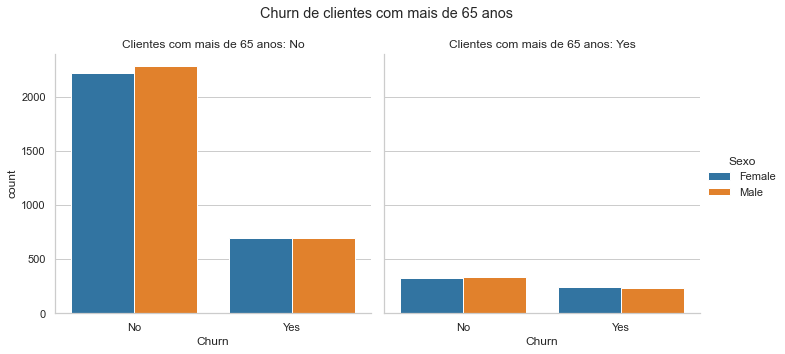

In [205]:
sns.set_theme(style="whitegrid", palette = "tab10")
plot = sns.catplot(data=df, kind='count', x='Churn', hue='Sexo', col='Senior');
plot.set_titles('Clientes com mais de 65 anos: {col_name}');
plot.fig.subplots_adjust(top=.85);
plot.fig.suptitle('Churn de clientes com mais de 65 anos');

Após essa análise conseguimos verificar com essa análise que os clientes com mais de 65 anos são os que mais encerram o contrato com nossa empresa.

## Relação do Churn com o tempo de contrato

Vamos verificar agora a relação que o Churn tem com o tempo de contrato com os clientes

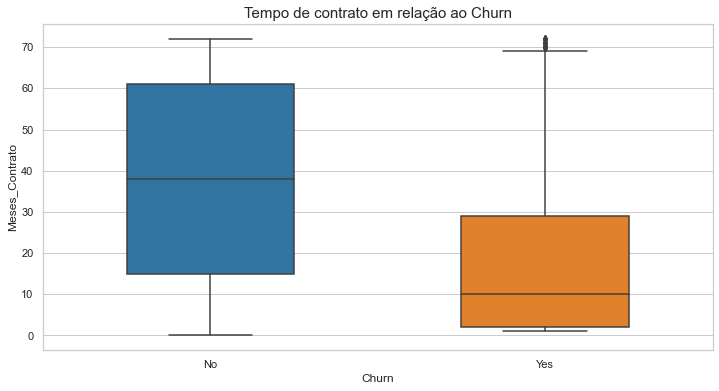

In [207]:
sns.set_theme(style="whitegrid", palette = "tab10")
plt.figure(figsize=(12,6))
ax = sns.boxplot(data = df, x = 'Churn', y = 'Meses_Contrato', width = 0.5)
ax.set_title('Tempo de contrato em relação ao Churn', fontsize = 15)

plt.show()

Com essa análise podemos verificar que os clientes que deixam a empresa são os que possuem menos tempo de contrato

## Forma do contrato do cliente

Irei verificar a forma de contrato dos clientes no geral

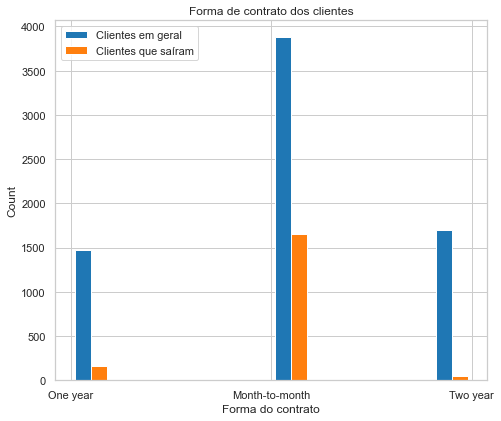

In [209]:
fig = plt.figure(figsize=(6,5))
eixo = fig.add_axes([0,0,1,1])

sns.set_theme(style="whitegrid", palette = "tab10")
eixo.hist([df.Contrato, Churn_yes.Contrato], label = ['Clientes em geral', 'Clientes que saíram'])
eixo.set_title('Forma de contrato dos clientes')
eixo.set_ylabel('Count')
eixo.set_xlabel('Forma do contrato')
eixo.legend(loc='upper left')

Podemos observar que o contrato com o maior abandono foi o mensal, porém é contrato com o maior número de clientes

## Análise dos Serviços utilizados pelos clientes

Irei verificar algumas informações do serviços que os clientes utilizavam para enteder se pode ter alguma relação com o Churn

In [198]:
def porcentagem(plot, df):
  total = float(len(df))
  for p in plot.ax.patches:
    porc = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    plot.ax.annotate(porc, (x, y),ha='center')

  return plot

### Streaming Filmes

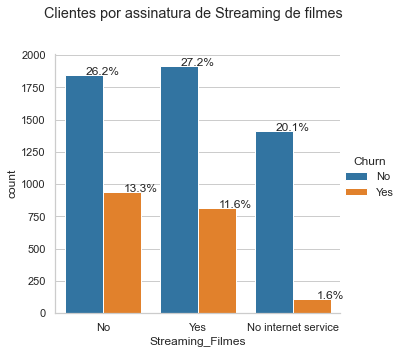

In [210]:
sns.set_theme(style="whitegrid", palette = "tab10")
plot = sns.catplot(data=df, kind='count', x='Streaming_Filmes', hue='Churn');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Clientes por assinatura de Streaming de filmes');
plot = porcentagem(plot, df)

### Streaming TV

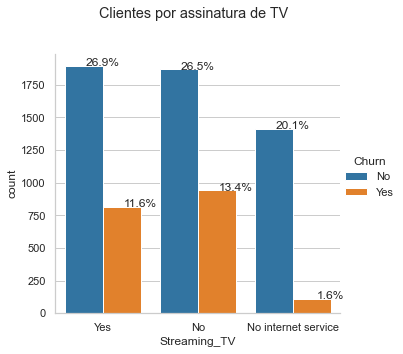

In [212]:
sns.set_theme(style="whitegrid", palette = "tab10")
plot = sns.catplot(data=df, kind='count', x='Streaming_TV', hue='Churn');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Clientes por assinatura de TV');
plot = porcentagem(plot, df)

### Serviço de Internet

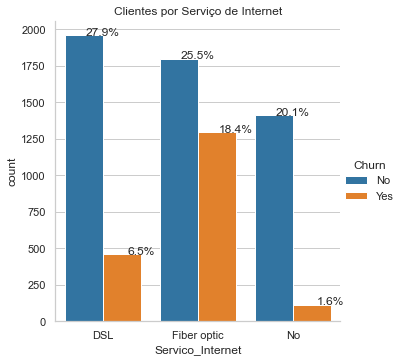

In [213]:
sns.set_theme(style="whitegrid", palette = "tab10")
plot = sns.catplot(data=df, kind='count', x='Servico_Internet', hue='Churn');
plot.set(title='Clientes por Serviço de Internet');

plot = porcentagem(plot, df)

### Segurança Online

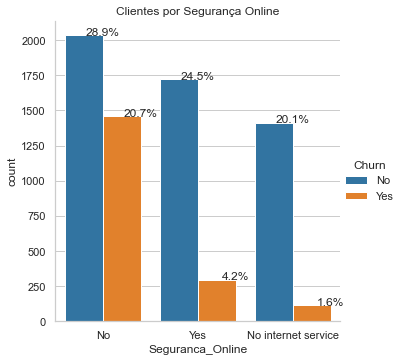

In [215]:
sns.set_theme(style="whitegrid", palette = "tab10")
plot = sns.catplot(data=df, kind='count', x='Seguranca_Online', hue='Churn');
plot.set(title='Clientes por Segurança Online');

plot = porcentagem(plot, df)

## Resumo da análise realizada

Ao realizar a análise nos dados da empresa Alura Voz pude chegar em algumas conclusões que podem ajudar na resolução do problema

* Pude identificar que o Churn não tem relação nenhuma com o sexo dos clientes.
*  O maior indice de clientes que encerram o contrato tem menos de 65 anos. O que podemos fazer é realizar uma análise mais detalhada em uma base de dados que possua a informação da idade de todos os clientes para conseguir explorar esse tópico.
*  Os clientes com menos tempo de contrato são os que mais encerram o mesmo, podemos focar em algumas ações para fidelizar o cliente com algum serviço diferenciado para que continue com a empresa.
*  Os clientes do plano mensal são a maioria porém são os que mais deixam a empresa, pode ser que promoções em um plano com duração maior seja interessante.
*  Para concluir os dois pontos que mais impactaram no Churn dos clientes, foram a não contratação dos clientes pela segurança online. E também os clientes que possuem internet de fibra óptica. A empresa precisa focar nesses tópicos para oferer condições melhores para os clientes em questão na segurança e realizar uma pesquisa de campo para entender o porque a internet de fibra não está agradando.